Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls -lh /content/drive/MyDrive/

ls: '/content/drive/MyDrive/SEO Contract Work': No such file or directory
total 430M
-rw------- 1 root root 311K Jun  8  2024 '01-911 Calls Data Capstone Project.ipynb'
-rw------- 1 root root  52M Jun 14  2024  01-Powerpoint-Infographics.rar
-rw------- 1 root root 313K Jun  8  2024 '02-911 Calls Data Capstone Project - Solutions.ipynb'
-rw------- 1 root root 2.6M Jun  8  2024 '03-Finance Project.ipynb'
-rw------- 1 root root 923K Jun 25  2021 '0401 Himanshu.pdf'
-rw------- 1 root root 924K Jun 25  2021 '0402 Himanshu.pdf'
-rw------- 1 root root 924K Jun 25  2021 '0403 Himanshu.pdf'
-rw------- 1 root root 926K Jun 25  2021 '0404 Meet Garg.pdf'
-rw------- 1 root root 923K Jun 25  2021 '0405 Harish Kumar Mishra.pdf'
-rw------- 1 root root 923K Jun 25  2021 '0406 Himanshu.pdf'
-rw------- 1 root root 923K Jun 25  2021 '0407 Mohit Sehgal.pdf'
-rw------- 1 root root 927K Jun 25  2021 '0408 Seema Mandal.pdf'
-rw------- 1 root root 921K Jun 25  2021 '0409 Utsav Bharadwaj.pdf'
-rw------- 1 root 

In [ ]:
zip_path = '/content/drive/MyDrive/AI ML Lectures/Excercises and Practice files/Deep Learning/pizza_steak.zip'

In [ ]:
extract_path = '/content/pizza_steak'

In [ ]:
with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
!ls pizza_steak/pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

there are 1 directories and 0 images in 'pizza_steak'
there are 2 directories and 0 images in 'pizza_steak/pizza_steak'
there are 2 directories and 0 images in 'pizza_steak/pizza_steak/train'
there are 0 directories and 750 images in 'pizza_steak/pizza_steak/train/steak'
there are 0 directories and 750 images in 'pizza_steak/pizza_steak/train/pizza'
there are 2 directories and 0 images in 'pizza_steak/pizza_steak/test'
there are 0 directories and 250 images in 'pizza_steak/pizza_steak/test/steak'
there are 0 directories and 250 images in 'pizza_steak/pizza_steak/test/pizza'


In [ ]:
len(os.listdir("/content/pizza_steak/pizza_steak/train/steak"))

750

In [ ]:
#Glob is a python module to find files and directories matching any specific pattern

import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.title(target_class)
    plt.imshow(img)
    print(f"Image shape: {img.shape}") # (512,512,3) = (width,height, 3 channels - rgb)
    return img

Image shape: (512, 512, 3)


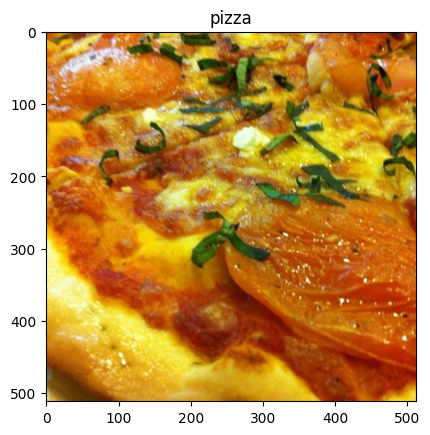

In [ ]:
img = view_random_image(target_dir = "pizza_steak/pizza_steak/train/",
                        target_class = "pizza")

array([[[202,  84,  14],
        [197,  79,   9],
        [192,  73,   7],
        ...,
        [203, 109,  19],
        [191,  99,  14],
        [183,  91,   8]],

       [[195,  77,   5],
        [192,  74,   4],
        [188,  69,   1],
        ...,
        [196, 102,  14],
        [185,  90,   8],
        [177,  82,   2]],

       [[195,  74,   1],
        [193,  72,   0],
        [191,  70,   0],
        ...,
        [185,  88,   7],
        [174,  76,   1],
        [167,  69,   0]],

       ...,

       [[220, 221, 189],
        [220, 218, 180],
        [224, 217, 171],
        ...,
        [243, 217,  62],
        [242, 217,  62],
        [240, 215,  60]],

       [[225, 224, 193],
        [222, 220, 182],
        [226, 219, 173],
        ...,
        [243, 217,  58],
        [241, 217,  57],
        [240, 216,  56]],

       [[227, 226, 195],
        [222, 220, 182],
        [227, 219, 173],
        ...,
        [244, 219,  57],
        [241, 217,  55],
        [241, 217,  55]]], dtype=uint8)
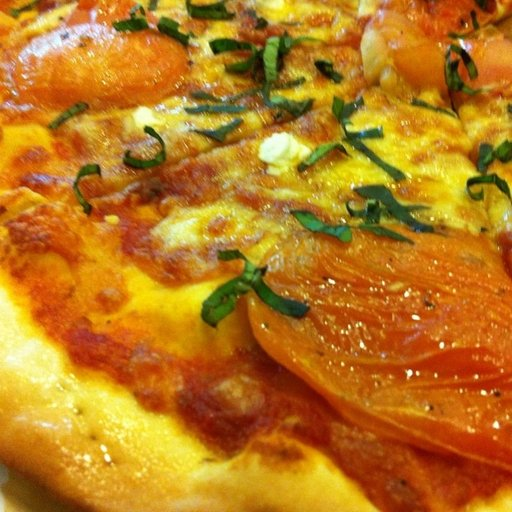

In [ ]:
img

In [ ]:
img/255.

array([[[0.79215686, 0.32941176, 0.05490196],
        [0.77254902, 0.30980392, 0.03529412],
        [0.75294118, 0.28627451, 0.02745098],
        ...,
        [0.79607843, 0.42745098, 0.0745098 ],
        [0.74901961, 0.38823529, 0.05490196],
        [0.71764706, 0.35686275, 0.03137255]],

       [[0.76470588, 0.30196078, 0.01960784],
        [0.75294118, 0.29019608, 0.01568627],
        [0.7372549 , 0.27058824, 0.00392157],
        ...,
        [0.76862745, 0.4       , 0.05490196],
        [0.7254902 , 0.35294118, 0.03137255],
        [0.69411765, 0.32156863, 0.00784314]],

       [[0.76470588, 0.29019608, 0.00392157],
        [0.75686275, 0.28235294, 0.        ],
        [0.74901961, 0.2745098 , 0.        ],
        ...,
        [0.7254902 , 0.34509804, 0.02745098],
        [0.68235294, 0.29803922, 0.00392157],
        [0.65490196, 0.27058824, 0.        ]],

       ...,

       [[0.8627451 , 0.86666667, 0.74117647],
        [0.8627451 , 0.85490196, 0.70588235],
        [0.87843137, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/pizza_steak/train/"
test_dir = "pizza_steak/pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### TINY-VGG

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                            kernel_size = 3,
                            activation = 'relu',
                            input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(filters = 10,
                            kernel_size = 3,
                            activation = 'relu',
                            input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_1.compile(loss= "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.5860 - loss: 0.6805 - val_accuracy: 0.7720 - val_loss: 0.5060
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.7610 - loss: 0.5077 - val_accuracy: 0.7780 - val_loss: 0.4626
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7678 - loss: 0.4692 - val_accuracy: 0.8600 - val_loss: 0.3542
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.8274 - loss: 0.3830 - val_accuracy: 0.8200 - val_loss: 0.3867
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8626 - loss: 0.3522 - val_accuracy: 0.8240 - val_loss: 0.4026


In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 220, 220, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 110, 110, 10)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 108, 108, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 106, 106, 10)        │             910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 53, 53, 10)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28090)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          28,091 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

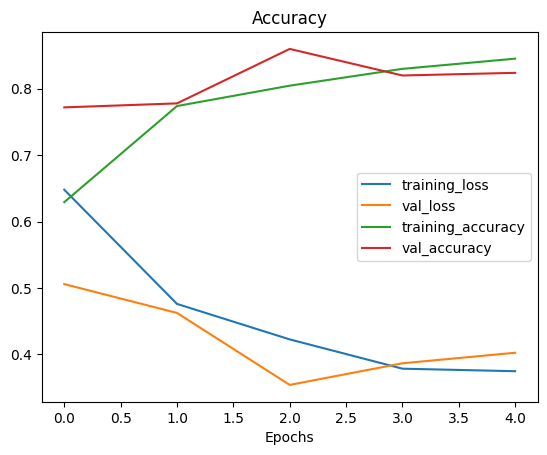

In [ ]:
def plot_loss(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()


plot_loss(history_1)

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels = 3)
    img = tf.image.resize(img, size = [img_shape,img_shape])
    img = img/255.
    return img

In [ ]:
pizza = load_and_prep_image('/content/pizza_steak/pizza_steak/test/pizza/1001116.jpg')
pizza

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3515406 , 0.34761903, 0.41820726],
        [0.3462185 , 0.34229693, 0.41288516],
        [0.34735894, 0.34343737, 0.4140256 ],
        ...,
        [0.6792716 , 0.77955186, 0.917647  ],
        [0.66134447, 0.76330525, 0.9084033 ],
        [0.6473389 , 0.75714284, 0.9022409 ]],

       [[0.34565824, 0.34173667, 0.4123249 ],
        [0.34901962, 0.34509805, 0.41568628],
        [0.35238093, 0.34845936, 0.4190476 ],
        ...,
        [0.7294116 , 0.82352924, 0.96314526],
        [0.70674247, 0.8019407 , 0.94313705],
        [0.67667025, 0.77863103, 0.9211278 ]],

       [[0.34985995, 0.34593838, 0.41484594],
        [0.35434175, 0.35042018, 0.41932774],
        [0.35218087, 0.35126048, 0.42184874],
        ...,
        [0.52697045, 0.61016375, 0.72585   ],
        [0.49477777, 0.58425355, 0.7002801 ],
        [0.45828268, 0.55152017, 0.6708678 ]],

       ...,

       [[0.38095245, 0.47899166, 0.7378152 ],
        [0.37

In [ ]:
model_1.predict(pizza)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [ ]:
pizza.shape

TensorShape([224, 224, 3])

In [ ]:
pizza = tf.expand_dims(pizza,axis = 0)
pizza.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred = model_1.predict(pizza)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


array([[0.37631136]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

np.str_('pizza')

In [ ]:
def pred_and_plot(model, filename, class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis = 0))
    pred_class = class_names[int(tf.round(pred)[0][0])]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


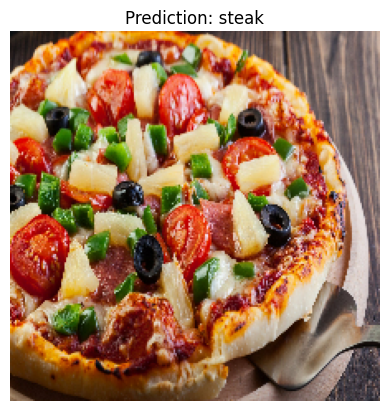

In [ ]:
pred_and_plot(model_1, "/content/371886-food-pizza.jpg", class_names)